In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv('/content/beer-servings.csv',index_col='Unnamed: 0')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [ ]:
data.isna().sum()

,0
country,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


In [ ]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [ ]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']:
      data[i]=data[i].fillna(data[i].median())

In [ ]:
data.isna().sum()

,0
country,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0
continent,0


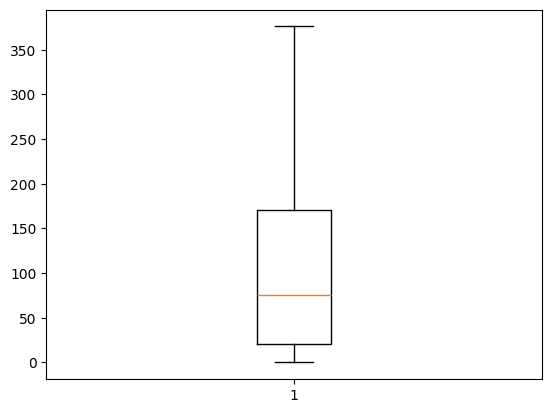

In [ ]:
# Outlier Detection
plt.boxplot(data['beer_servings'])
plt.show()
# no outliers

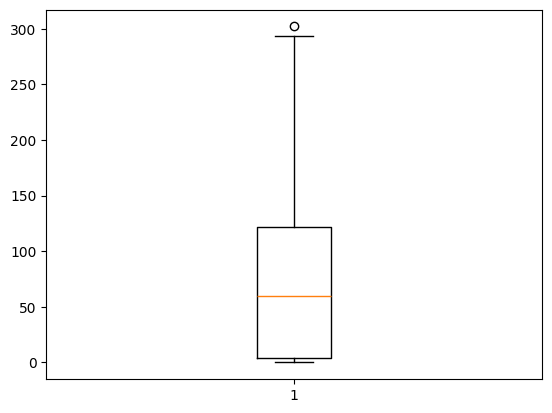

In [ ]:
plt.boxplot(data['spirit_servings'])
plt.show()
# We have outliers

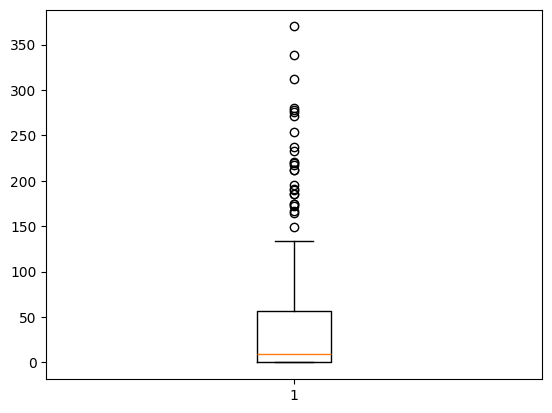

In [ ]:
plt.boxplot(data['wine_servings'])
plt.show()

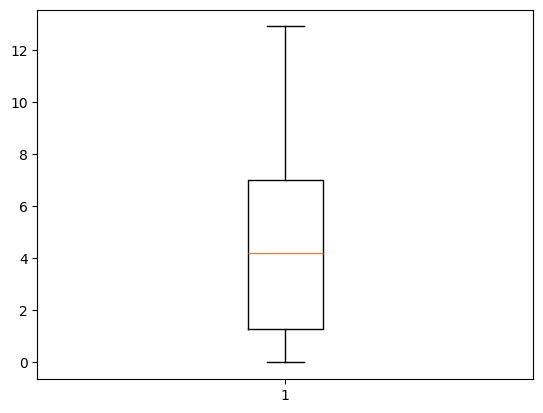

In [ ]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.show()

In [ ]:
q1=np.percentile(data['spirit_servings'],25)
q1

5.0

In [ ]:
q3=np.percentile(data['spirit_servings'],75)
q3

128.0

In [ ]:
IQR=q3-q1
IQR

123.0

In [ ]:
lower_limit=q1-1.5*IQR
lower_limit

-179.5

In [ ]:
upper_limit=q3+1.5*IQR
upper_limit

312.5

In [ ]:
outlier=[]
for x in data['spirit_servings']:
  if x<lower_limit or x > upper_limit:
    outlier.append(x)

In [ ]:
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [ ]:
ind=data['spirit_servings'] > upper_limit
data.loc[ind].index

Index([15, 68, 73, 141, 144], dtype='int64')

In [ ]:
data.drop([15, 68, 73, 141, 144],inplace=True)

In [ ]:
data.shape

(188, 6)